In [1]:
import plotly.graph_objects as go # We are only importing the 'graph_objects' module from plotly here
import pandas as pd
import numpy as np 
import plotly.io as pio
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays


In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# .columns method shows the list of all column names in the dataframe df

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df["children"] = df["children"].fillna(0)
df["country"] = df["country"].fillna("Undefined")
df["agent"] = df["agent"].fillna(0)
df["company"] = df["company"].fillna(0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
print ('Hotel                :', df.hotel.unique())
print ('\nYear                 :', df.arrival_date_year.unique())
print ('\nMonth                :',df.arrival_date_month.unique())
print ('\nMeal                 :', df.meal.unique())
print ('\nCountry              :', df.country.unique())
print ('\nMarket Segment       :', df.market_segment.unique())
print ('\nDistribution Channel :', df.distribution_channel.unique())
print ('\nReserved Room Type   :', df.reserved_room_type.unique())
print ('\nAssigned Room Type   :', df.assigned_room_type.unique())
print ('\nDeposit Type         :', df.deposit_type.unique())
print ('\nCustomer Type        :', df.customer_type.unique())
print ('\nReservation Status   :', df.reservation_status.unique())

Hotel                : ['Resort Hotel' 'City Hotel']

Year                 : [2015 2016 2017]

Month                : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Meal                 : ['BB' 'FB' 'HB' 'SC' 'Undefined']

Country              : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Undefined' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 

In [9]:
df["is_canceled"] = df["is_canceled"].replace({1:"Yes", 0:"No"})
df["is_repeated_guest"] = df["is_repeated_guest"].replace({1:"Yes", 0:"No"})
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,No,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,No,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
country_wise_guests = df[df['is_canceled'] == 'No']['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,PYF,1
162,KIR,1
163,ASM,1
164,ATF,1


In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
guest_no_kids =  df[df['children'] == 0]['arrival_date_month'].value_counts().reset_index()
guest_no_kids.columns = ['month', 'guests with no kids']
guest_no_kids

,month,guests with no kids
0,August,11934
1,May,11234
2,July,11047
3,October,10671
4,April,10310
5,June,10216
6,September,10118
7,March,9308
8,February,7503
9,November,6590


In [17]:
data = dict(type='bar', 
            x=guest_no_kids['month'],
            y=guest_no_kids['guests with no kids']
           )

layout = dict(title=dict(text= 'Monthly reservation without kids'),
              xaxis=dict(title='Month'),
              yaxis=dict(title='Guests with no kids')
             )

clear_figure = go.Figure(data=data,
                        layout=layout)
clear_figure.show()

In [18]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [19]:
#df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_resort = df[(df['hotel'] == 'Resort Hotel')]
#data_resort
data_resort_no_kids =data_resort[(data_resort['children'] == 0) & (data_resort['babies'] == 0)]['arrival_date_month'].value_counts().reset_index()
#data_resort_no_kids
data_resort_with_kids =data_resort[(data_resort['children'] != 0) | (data_resort['babies'] != 0)]['arrival_date_month'].value_counts().reset_index()
data_resort_final = data_resort_no_kids.merge(data_resort_with_kids , on = 'index' )
data_resort_final.columns = ['month' , 'without kids' , 'with kids']
data_resort_final=sort_month(data_resort_final, 'month')
data_resort_final


#final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
#final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']

,month,without kids,with kids
0,January,2084,109
1,February,2878,225
2,March,3146,190
3,April,3350,259
4,May,3286,273
5,June,2695,350
6,July,3757,816
7,August,3897,997
8,September,2908,200
9,October,3347,208


In [50]:
resort_without_kid = dict(type='bar',
                    x=data_resort_final['month'],
                    y=data_resort_final['without kids'], 
                    name='Guests without kids'
                   )

resort_with_kid = dict(type='bar',
                    x=data_resort_final['month'],
                    y=data_resort_final['with kids'], 
                    name='Guests with kids'
                   )
resort_data_kids = [resort_without_kid , resort_with_kid]

resort_layout =dict(title=dict(text='Number of Resort Hotel guests with and without kids'),
                 yaxis=dict(title='Guest count'),
                 xaxis=dict(title='Month'),
                 barmode='overlay' # It is in the layout that we define the barmode to stacked, by default is as 'group'
                                    # try any of these 'stack', 'group', 'overlay', 'relative'
                 )

resort_fig = go.Figure(data=resort_data_kids, layout=resort_layout)
resort_fig.show()


#need to present % wise and can add column for city hotel also 

In [52]:
data_hotel = df[(df['hotel'] == 'City Hotel')]
#data_hotel
data_hotel_no_kids =data_hotel[data_hotel['children'] == 0 & (data_hotel['babies'] == 0)]['arrival_date_month'].value_counts().reset_index()
#data_hotel_no_kids
data_hotel_with_kids =data_hotel[data_hotel['children'] != 0 | (data_hotel['babies'] != 0)]['arrival_date_month'].value_counts().reset_index()
data_hotel_final = data_hotel_no_kids.merge(data_hotel_with_kids , on = 'index' )
data_hotel_final.columns = ['month' , 'with kids' , 'without kids']
sort_month(data_hotel_final, 'month')
data_hotel_final

,month,with kids,without kids
0,August,7926,1086
1,May,7901,348
2,June,7492,427
3,October,7302,324
4,July,7226,877
5,September,7171,259
6,April,6938,555
7,March,6137,343
8,February,4604,377
9,November,4229,148


In [53]:
hotel_without_kid = dict(type='scatter',
                    x=data_hotel_final['month'],
                    y=data_hotel_final['without kids'], 
                    name='Guests without kids'
                   )

hotel_with_kid = dict(type='scatter',
                    x=data_hotel_final['month'],
                    y=data_hotel_final['with kids'], 
                    name='Guests with kids'
                   )
hotel_data_kids = [hotel_without_kid , hotel_with_kid]

hotel_layout =dict(title=dict(text='Number of City Hotel guests with and without kids'),
                 yaxis=dict(title='Guest count'),
                 xaxis=dict(title='Month'),
                 barmode='overlay' # It is in the layout that we define the barmode to stacked, by default is as 'group'
                                    # try any of these 'stack', 'group', 'overlay', 'relative'
                 )

hotel_fig = go.Figure(data=hotel_data_kids, layout=hotel_layout)
hotel_fig.show()


In [40]:
df["meal"] = df["meal"].replace({"BB":"Bed & Breakfast", "HB":"Half board", "FB":"Full board", "SC":"No meal package", "Undefined":"No meal package"})
#meal_selection with and with out kids (meal selection , with kids or without kids)

meal_without_kids = df[(df['children'] == 0) & (df['babies'] == 0)]['meal'].value_counts().reset_index()
meal_without_kids.columns = ['Meal selection' ,'Guests without kids' ]


meal_with_kids = df[(df['children'] != 0) | (df['babies'] != 0)]['meal'].value_counts().reset_index()
meal_with_kids.columns = ['Meal selection' ,'Guests with kids' ]

In [42]:
meal_without_kids

,Meal selection,Guests without kids
0,Bed & Breakfast,84700
1,Half board,13074
2,No meal package,11570
3,Full board,714


In [43]:
meal_with_kids

,Meal selection,Guests with kids
0,Bed & Breakfast,7610
1,Half board,1389
2,No meal package,249
3,Full board,84


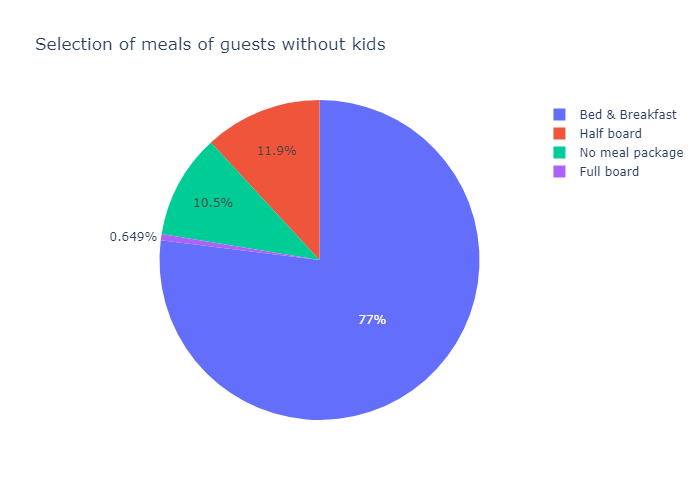

In [45]:
labels_1 = meal_without_kids['Meal selection']

#Sum of all Emissions for each continent
values_1 = meal_without_kids['Guests without kids']

data_8 = dict(type='pie', labels=labels_1, values=values_1)

layout_8 = dict(title=dict(text='Selection of meals of guests without kids'))

fig_8 = go.Figure(data=[data_8], layout=layout_8)

fig_8.show(renderer='png')

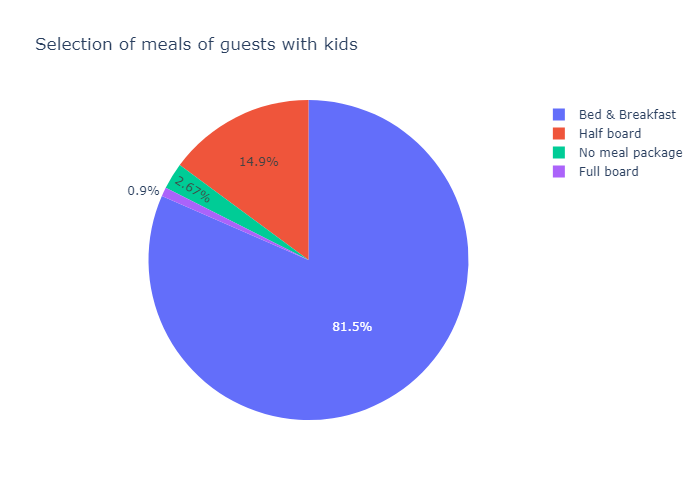

In [46]:
labels_w = meal_with_kids['Meal selection']

#Sum of all Emissions for each continent
values_w = meal_with_kids['Guests with kids']

data_w = dict(type='pie', labels=labels_w, values=values_w)

layout_w = dict(title=dict(text='Selection of meals of guests with kids'))

fig_w = go.Figure(data=[data_w], layout=layout_w)

fig_w.show(renderer='png')

In [ ]:
# parking space ,week days or week ends,  room type, advance booking